# Policy Iteration

In [1]:
import numpy as np
import gym

## Question Page

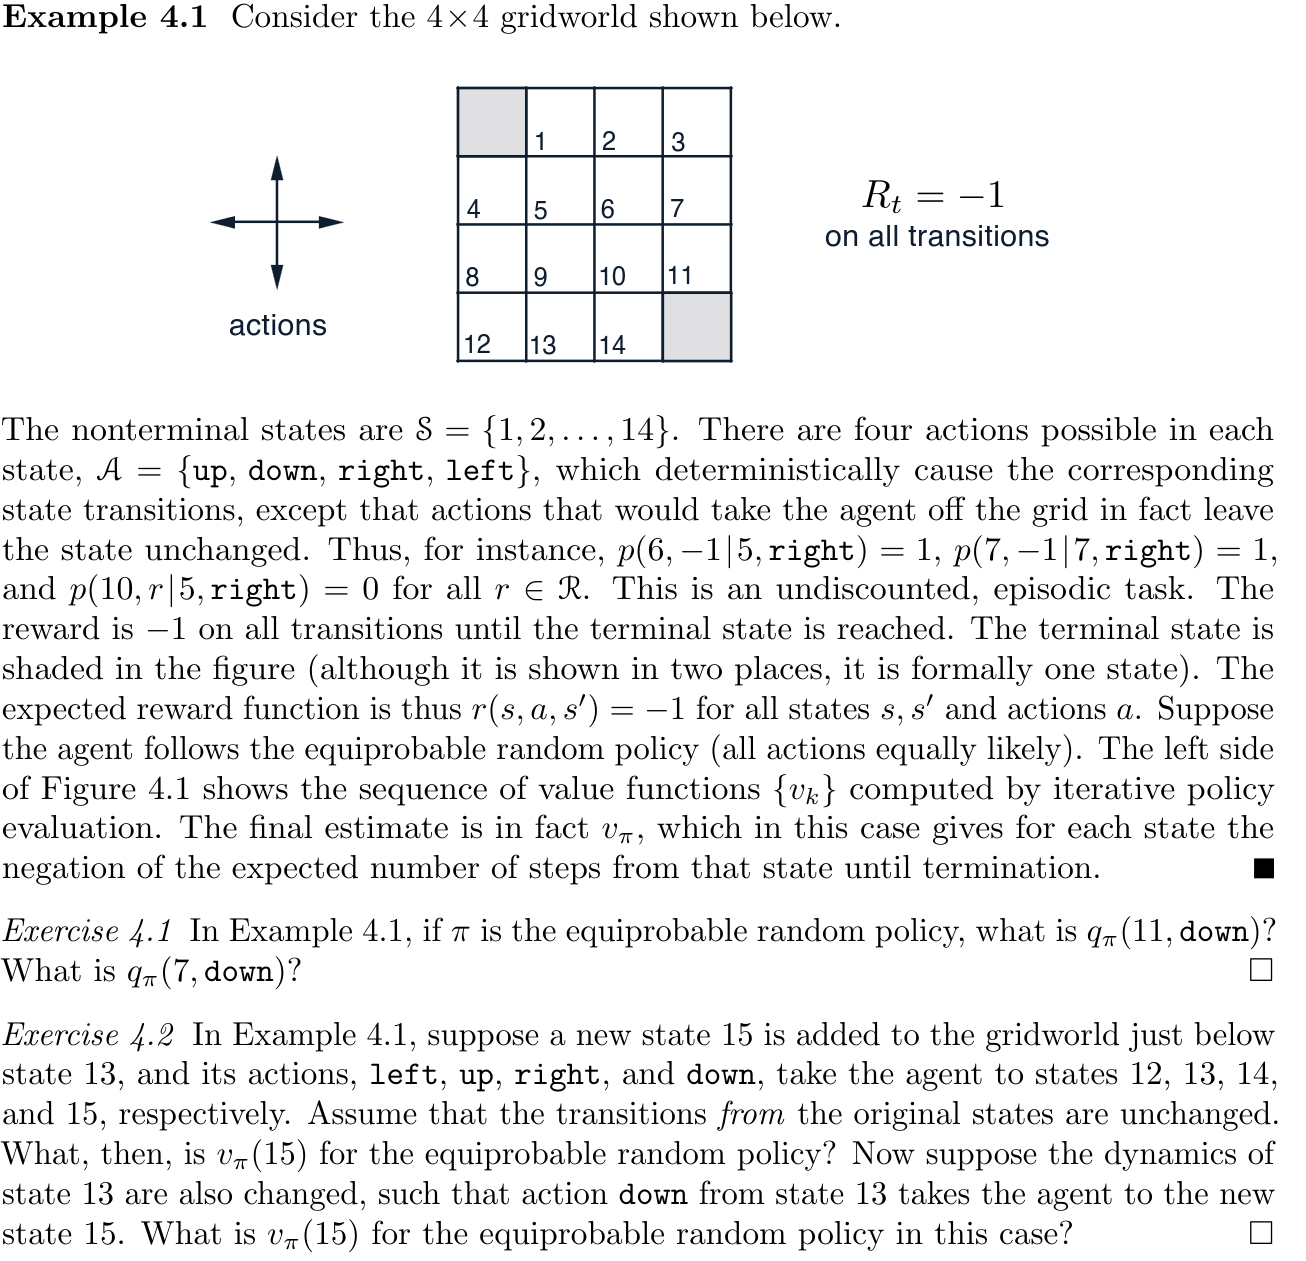


## Exercise 4.1

In [2]:
delta_ = 0.01
number_of_states = 14
s = [i+1 for i in range(14)]
v = np.zeros(number_of_states+2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
while True:
  delta = 0;
  for state in s:
    previous_value = v[state]
    if(state >= 1 and state <= 3):
      utran = -1 + v[state]
    else:
      utran = -1 + v[state-4]
    if(state >= 12 and state <= 14):
      dtran = -1 + v[state]
    else:
      dtran = -1 + v[state+4]
    if(state % 4 == 0):
      ltran = -1 + v[state]
    else:
      ltran = -1 + v[state-1]
    if(state % 4 == 3):
      rtran = -1 + v[state]
    else:
      rtran = -1 + v[state+1]
    v[state] = (1/4) *utran + (1/4)* ltran + (1/4)* rtran + (1/4)*dtran
    delta = max(delta, abs(v[state] - previous_value))
  if(delta  < delta_):
    break

In [4]:
print(v)

[  0.         -13.934831   -19.90631084 -21.89687771 -13.934831
 -17.92002909 -19.91316996 -19.91416281 -19.90631084 -19.91316996
 -17.92673135 -13.94529672 -21.89687771 -19.91416281 -13.94529672
   0.        ]


## Exercise 4.2

In [5]:
delta_ = 0.01
number_of_states = 14
s = [i+1 for i in range(14)]
s.append(16)
v = np.zeros(number_of_states+3)

In [6]:
while True:
  delta = 0;
  for state in s:
    previous_value = v[state]
    if(state == 16):
      ltran = -1 + v[12]
      utran = -1 + v[13]
      rtran = -1 + v[14]
      dtran = -1 + v[16]
      v[state] = (1/4) *utran + (1/4)* ltran + (1/4)* rtran + (1/4)*dtran
      delta = max(delta, abs(v[state] - previous_value))
      continue
    else:
      if(state >= 1 and state <= 3):
        utran = -1 + v[state]
      else:
        utran = -1 + v[state-4]
      if(state >= 12 and state <= 14):
        dtran = -1 + v[state]
      else:
        dtran = -1 + v[state+4]
      if(state == 13):
        dtran = -1 + v[16]
      if(state % 4 == 0):
        ltran = -1 + v[state]
      else:
        ltran = -1 + v[state-1]
      if(state % 4 == 3):
        rtran = -1 + v[state]
      else:
        rtran = -1 + v[state+1]
    v[state] = (1/4) *utran + (1/4)* ltran + (1/4)* rtran + (1/4)*dtran
    delta = max(delta, abs(v[state] - previous_value))
  if(delta  < delta_):
    break

In [7]:
print(v)

[  0.         -13.93734946 -19.9098236  -21.90066457 -13.93766957
 -17.92339481 -19.91663543 -19.9174538  -19.91067581 -19.91725223
 -17.92994979 -13.9475204  -21.9020235  -19.91893241 -13.94802891
   0.         -19.92055131]


## Application into Gym Environments

In [8]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, new_step_api=True)

In [9]:
action_size = env.action_space.n
state_size = env.observation_space.n
V = np.zeros(state_size)
delta = 0
delta_req = 1e-6
gamma = 0.9
PI = [np.random.randint(0,action_size) for i in range(0,state_size)]
reward = np.full((state_size,action_size),-1)
ep_max = 10000
state_action = np.full((state_size,action_size),-1)
print(state_size)

16


In [10]:
for episode in range(ep_max):
  state = env.reset()
  while True:
    action = env.action_space.sample()
    n_state, r, done, _, info = env.step(action)
    reward[state][action] = r
    state_action[state][action] = n_state
    state = n_state
    if done:
      break

In [11]:
states = [i for i in range(16)]
V[15] = 1
PI[15] = 2

In [12]:
while True:
  delta = 0
  for state in states:
    prev_val = V[state]
    action = PI[state]
    n_state = state_action[state][action]
    if n_state != -1:
      V[state] = reward[state][action] + gamma * V[n_state]
    else:
      V[state] = reward[state][action]
    delta = max(delta,abs(V[state]-prev_val))
  if (delta < delta_req):
    policy_stable = True
    for s in states:
      old_action = PI[s]
      old_val = V[s]
      best_val = old_val
      best_ac = old_action
      for ac in range(4):
        n_state = state_action[s][ac]
        if reward[s][ac] + gamma * V[n_state] > best_val:
          best_val = reward[s][ac] + gamma * V[n_state]
          best_ac = ac
          policy_stable = False

      if best_val != old_val:
        PI[s] = best_ac
    if policy_stable:
      break

In [13]:
for episode in range(100):
  state = env.reset()
  total_reward = 0
  while True:
    action = PI[state]
    n_state, r, done, _, info = env.step(action)
    state = n_state
    total_reward += r
    if done:
      print(total_reward)
      break

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


# Now working the same problem with Value Iteration

In [14]:
Val = np.zeros(state_size)

In [15]:
while True:
  delta = 0
  for s in states:
    old_v = Val[s]
    max_v = old_v
    for a in range(4):
      n_state = state_action[s][a]
      if n_state == -1 and max_v < reward[s][a]:
        max_v = reward[s][a]
      elif max_v < reward[s][a] + gamma * Val[n_state]:
        max_v = reward[s][a] + gamma * Val[n_state]
    Val[s] = max_v
    delta = max(delta,abs(max_v-old_v))
  if delta < delta_req:
    break

In [16]:
for episode in range(5):
  state = env.reset()
  total_reward = 0
  while True:
    action = 0
    best_value = 0
    for a in range(4):
      n_state = state_action[state][a]
      if n_state == state:
        continue
      if n_state == -1 and reward[state][a] > best_value:
        best_value = reward[state][a]
        action = a
      elif reward[state][a] + gamma * Val[n_state] > best_val:
        best_value = reward[state][a] + gamma * Val[n_state]
        action = a
    # print(action,state,state_action[state][action],reward[state][action] + gamma * Val[state_action[state][action]])
    n_state, r, done, _, info = env.step(action)
    state = n_state
    total_reward += r
    if done:
      print(total_reward)
      break

0.0
0.0
0.0
0.0
0.0
